In [ ]:
!unzip data.zip -d .
! rm -rf data/train/none
! rm -rf data/validation/none

In [2]:
from tensorflow.keras import applications

base_model = applications.MobileNet(weights='imagenet',  
                                    input_shape=(128, 128, 3),
                                    include_top=False) 

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1048640   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 16
INPUT_SIZE=(128, 128)

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    # shear_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.001,
    height_shift_range=0.001,
    zoom_range=0.001,
    horizontal_flip=True
)

# this is a generator that will read pictures found in
# subfolders of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    'data/train', 
    target_size=INPUT_SIZE, 
    # color_mode='grayscale',
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
    'data/validation',
    target_size=INPUT_SIZE,
    # color_mode='grayscale',
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1002 images belonging to 3 classes.
Found 317 images belonging to 3 classes.


In [5]:
from keras import callbacks

model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=".",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/batch_size,
    callbacks=[
        # callbacks.EarlyStopping(monitor='val_accuracy', patience=25),
        model_checkpoint_callback
    ]
)

Epoch 1/50
63/62 [==============================] - ETA: 0s - loss: 1.1824 - accuracy: 0.7505

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


62/62 [==============================] - 96s 1s/step - loss: 1.1824 - accuracy: 0.7505 - val_loss: 0.5631 - val_accuracy: 0.8833
Epoch 2/50
63/62 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8822

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


62/62 [==============================] - 92s 1s/step - loss: 0.4749 - accuracy: 0.8822 - val_loss: 0.3499 - val_accuracy: 0.9306
Epoch 3/50
62/62 [==============================] - 75s 1s/step - loss: 0.5654 - accuracy: 0.8383 - val_loss: 0.3794 - val_accuracy: 0.9148
Epoch 4/50
62/62 [==============================] - 75s 1s/step - loss: 0.4392 - accuracy: 0.8842 - val_loss: 0.4361 - val_accuracy: 0.9274
Epoch 5/50
62/62 [==============================] - 75s 1s/step - loss: 0.5784 - accuracy: 0.8433 - val_loss: 0.2976 - val_accuracy: 0.9117
Epoch 6/50
62/62 [==============================] - 75s 1s/step - loss: 0.4622 - accuracy: 0.8733 - val_loss: 0.3931 - val_accuracy: 0.9306
Epoch 7/50
63/62 [==============================] - ETA: 0s - loss: 0.2596 - accuracy: 0.9541

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


62/62 [==============================] - 93s 1s/step - loss: 0.2596 - accuracy: 0.9541 - val_loss: 0.2063 - val_accuracy: 0.9811
Epoch 8/50
62/62 [==============================] - 76s 1s/step - loss: 0.4464 - accuracy: 0.8962 - val_loss: 0.6372 - val_accuracy: 0.9338
Epoch 9/50
62/62 [==============================] - 76s 1s/step - loss: 0.3425 - accuracy: 0.9132 - val_loss: 0.2930 - val_accuracy: 0.9621
Epoch 10/50
62/62 [==============================] - 75s 1s/step - loss: 0.3343 - accuracy: 0.9301 - val_loss: 0.6643 - val_accuracy: 0.9653
Epoch 11/50
63/62 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.9321

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


62/62 [==============================] - 93s 1s/step - loss: 0.3280 - accuracy: 0.9321 - val_loss: 0.1633 - val_accuracy: 0.9937
Epoch 12/50
62/62 [==============================] - 75s 1s/step - loss: 0.5117 - accuracy: 0.8832 - val_loss: 0.5698 - val_accuracy: 0.8707
Epoch 13/50
62/62 [==============================] - 75s 1s/step - loss: 0.3763 - accuracy: 0.9032 - val_loss: 0.1257 - val_accuracy: 0.9905
Epoch 14/50
62/62 [==============================] - 74s 1s/step - loss: 0.2674 - accuracy: 0.9441 - val_loss: 0.1491 - val_accuracy: 0.9811
Epoch 15/50
62/62 [==============================] - 75s 1s/step - loss: 0.3251 - accuracy: 0.9461 - val_loss: 0.1051 - val_accuracy: 0.9937
Epoch 16/50
63/62 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.9581

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


62/62 [==============================] - 92s 1s/step - loss: 0.2293 - accuracy: 0.9581 - val_loss: 0.1039 - val_accuracy: 0.9968
Epoch 17/50
62/62 [==============================] - 75s 1s/step - loss: 0.1689 - accuracy: 0.9691 - val_loss: 0.1135 - val_accuracy: 0.9905
Epoch 18/50
62/62 [==============================] - 75s 1s/step - loss: 0.3330 - accuracy: 0.9281 - val_loss: 0.2055 - val_accuracy: 0.9590
Epoch 19/50
62/62 [==============================] - 75s 1s/step - loss: 0.2244 - accuracy: 0.9551 - val_loss: 0.1017 - val_accuracy: 0.9905
Epoch 20/50
62/62 [==============================] - 76s 1s/step - loss: 0.3132 - accuracy: 0.9321 - val_loss: 0.6755 - val_accuracy: 0.8801
Epoch 21/50
62/62 [==============================] - 76s 1s/step - loss: 0.3088 - accuracy: 0.9222 - val_loss: 0.3346 - val_accuracy: 0.9306
Epoch 22/50
62/62 [==============================] - 75s 1s/step - loss: 0.3013 - accuracy: 0.8992 - val_loss: 0.1168 - val_accuracy: 0.9874
Epoch 23/50
62/62 [======

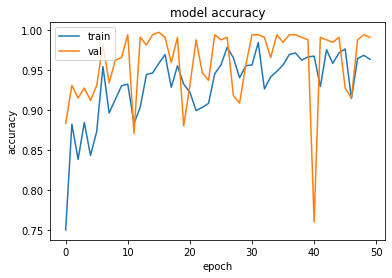

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
model.save("rps_transfer_model.h5")